In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.value_counts().sum()

np.int64(200)

In [7]:
df.drop("CustomerID",axis=1,inplace=True)

In [8]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

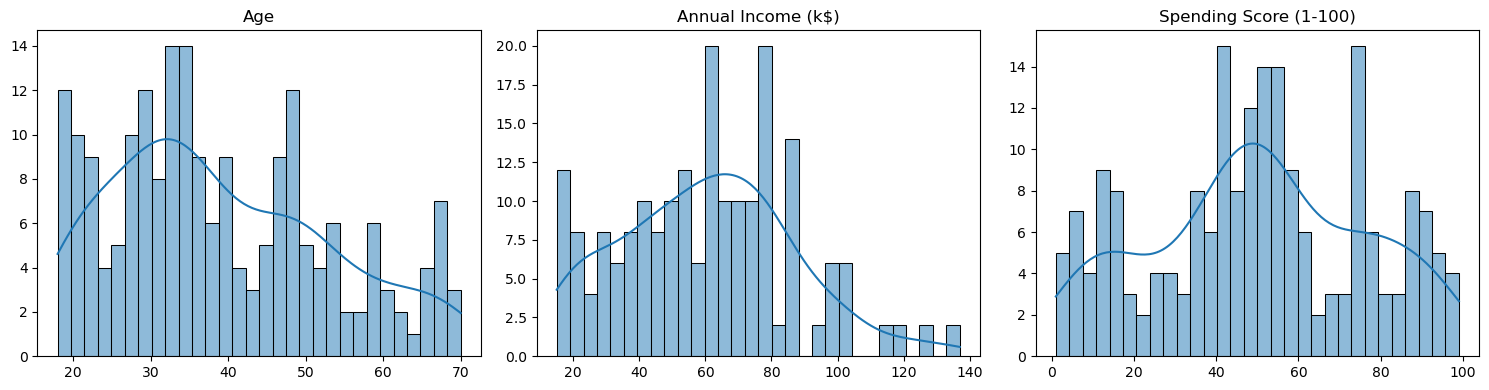

In [10]:
plot_all_histograms(df)

<Axes: xlabel='Genre', ylabel='count'>

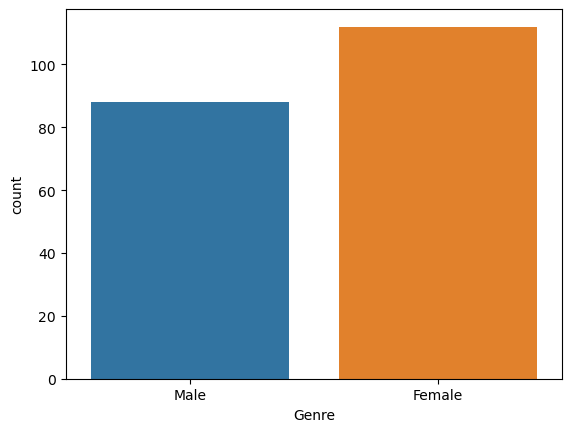

In [11]:
sns.countplot(data=df,x="Genre",hue="Genre")

In [13]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()

df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
df = pd.DataFrame(df_scaled, columns = df.columns)

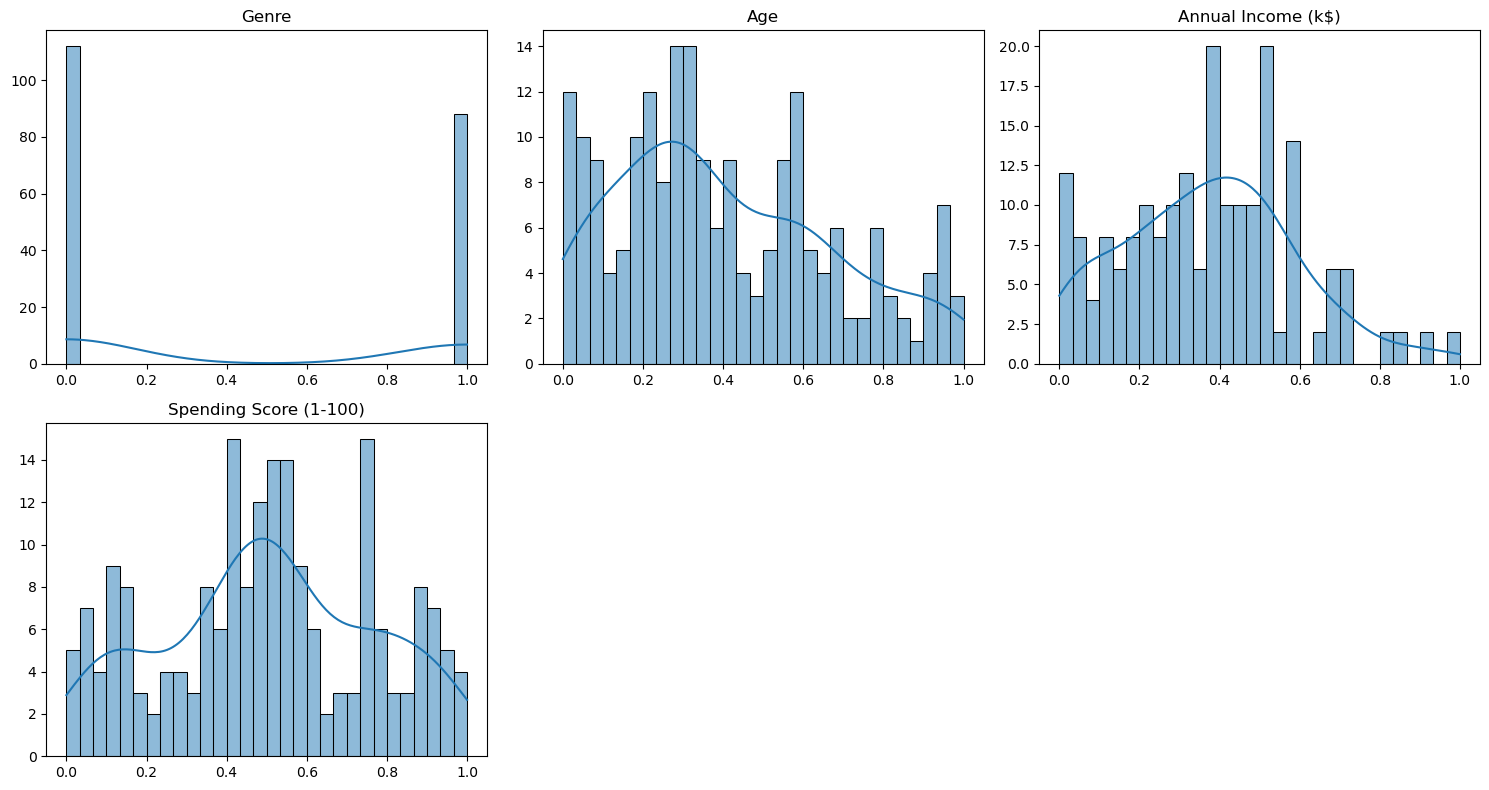

In [19]:
plot_all_histograms(df)

In [20]:
import scipy.cluster.hierarchy as sch

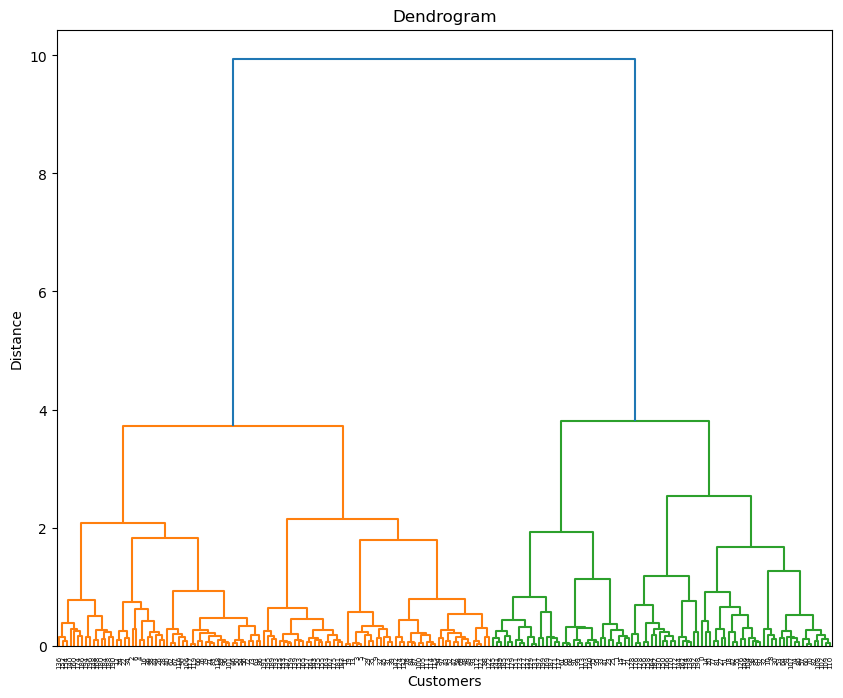

In [21]:
plt.figure(1, figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)
y_hc = hc.fit_predict(df)

In [24]:
df['cluster'] = pd.DataFrame(y_hc)

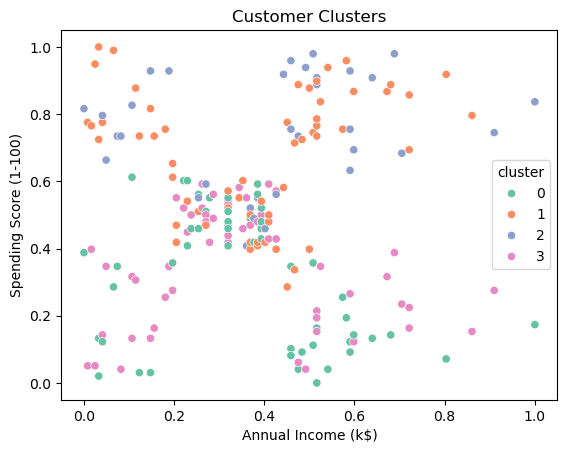

In [25]:
sns.scatterplot(data=df, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [26]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_hc))

0.7143503785893516


In [27]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

In [28]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X['cluster'] = y_hc

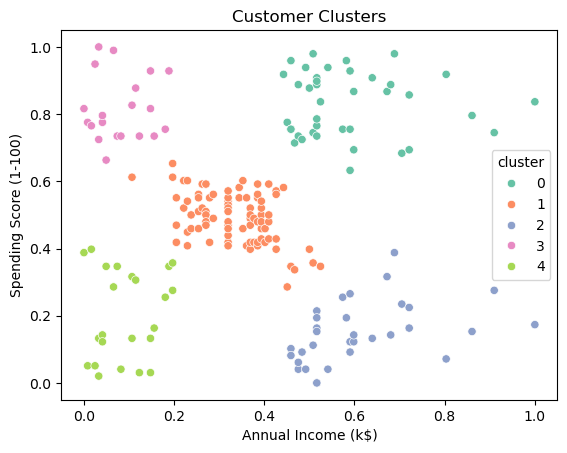

In [29]:
sns.scatterplot(data=X, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()